In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("conjunto_de_datos_defunciones_registrados_2020.csv", encoding='utf-8')
data.head()

,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,9,88,88,888,8888,0,999
1,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,0,999
2,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,2,88,88,888,8888,0,999
3,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,0,999
4,1,6,1,9,4,1,1,9,4,1,...,2020,NaN,2,1,88,88,888,8888,0,999


In [3]:
data.shape

(1086743, 59)

In [4]:
data_nl = data[data["ent_ocurr"]==19];
#data_nl = data[data["ent_regis"]==19]
data_nl.shape

(43629, 59)

In [5]:
data_nl = data_nl[['mun_ocurr','causa_def','lista_mex']]

In [6]:
data_nl['mun_ocurr'].nunique()

52

In [7]:
data_nl=data_nl[data_nl['mun_ocurr']!=999]

In [8]:
data_nl['mun_ocurr'].nunique()

51

In [9]:
glosario_mun = pd.read_csv("Glosario_municipios.csv");
glosario_mun = glosario_mun.to_dict();
glosario_mun = glosario_mun["Municipio"];

In [10]:
#glosario_ent = pd.read_csv("Glosario_entidades.csv");
#glosario_ent = glosario_ent.to_dict();
#glosario_ent = glosario_ent["NOM_ENT"];

In [11]:
data_nl = data_nl.replace({"mun_ocurr":glosario_mun})
data_nl

,mun_ocurr,causa_def,lista_mex
65474,Monterrey,U071,06T
70100,Monterrey,C410,11A
75312,Monterrey,I694,30F
77508,Galeana,U072,06T
78421,Galeana,P219,46E
...,...,...,...
966641,Guadalupe,X954,55
966693,Sabinas Hidalgo,I10X,27B
984545,Monterrey,I219,28A
1077466,Monterrey,E147,20D


In [12]:
data_nl.to_csv('data_muertos_nl.csv')

In [13]:
data_nl.groupby(by=['lista_mex']).count().sort_values(by="causa_def",ascending= False)

,mun_ocurr,causa_def
lista_mex,,
06T,9210,9210
28A,6916,6916
20D,4244,4244
33B,3314,3314
35M,938,938
...,...,...
43K,1,1
43L,1,1
43M,1,1


In [14]:
data_censo = pd.read_csv("conjunto_de_datos_iter_19CSV20.csv", encoding='utf-8')
data_censo.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,19,Nuevo León,0,Total de la entidad Nuevo León,0,Total de la Entidad,NaN,NaN,NaN,5784442,...,1537687,1150914,806584,490746,306104,36729,57505,439479,9797,*
1,19,Nuevo León,0,Total de la entidad Nuevo León,9998,Localidades de una vivienda,NaN,NaN,NaN,7782,...,1881,232,593,39,32,348,312,1907,147,*
2,19,Nuevo León,0,Total de la entidad Nuevo León,9999,Localidades de dos viviendas,NaN,NaN,NaN,3457,...,975,111,359,20,22,166,206,1038,77,*
3,19,Nuevo León,1,Abasolo,0,Total del Municipio,NaN,NaN,NaN,2974,...,746,351,359,126,108,18,43,399,9,*
4,19,Nuevo León,1,Abasolo,1,Abasolo,"100°23'59.958"" W","25°56'43.215"" N",502.0,1992,...,501,259,258,99,83,9,33,256,5,4


In [15]:
data_censo_agua = data_censo[['MUN',
'NOM_MUN',
'VPH_AGUADV',
'VPH_AEASP',
'VPH_AGUAFV',
'VPH_TINACO',
'VPH_CISTER',
'VPH_EXCSA',
'VPH_LETR',
'VPH_DRENAJ',
'VPH_NODREN']]
data_censo_agua

,MUN,NOM_MUN,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN
0,0,Total de la entidad Nuevo León,1636431,1596634,12098,237055,42436,1625769,19632,1633334,14630
1,0,Total de la entidad Nuevo León,1685,170,526,1224,451,1627,460,1688,523
2,0,Total de la entidad Nuevo León,894,130,302,595,174,814,293,881,315
3,1,Abasolo,781,763,17,46,3,782,6,788,10
4,1,Abasolo,542,542,1,24,0,536,5,542,1
...,...,...,...,...,...,...,...,...,...,...,...
4969,51,Villaldama,*,*,*,*,*,*,*,*,*
4970,51,Villaldama,*,*,*,*,*,*,*,*,*
4971,51,Villaldama,*,*,*,*,*,*,*,*,*
4972,51,Villaldama,14,2,5,6,5,14,5,16,3


In [16]:
data_censo_agua=data_censo_agua.replace('*',np.nan)
data_censo_agua

,MUN,NOM_MUN,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN
0,0,Total de la entidad Nuevo León,1636431,1596634,12098,237055,42436,1625769,19632,1633334,14630
1,0,Total de la entidad Nuevo León,1685,170,526,1224,451,1627,460,1688,523
2,0,Total de la entidad Nuevo León,894,130,302,595,174,814,293,881,315
3,1,Abasolo,781,763,17,46,3,782,6,788,10
4,1,Abasolo,542,542,1,24,0,536,5,542,1
...,...,...,...,...,...,...,...,...,...,...,...
4969,51,Villaldama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4970,51,Villaldama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4971,51,Villaldama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4972,51,Villaldama,14,2,5,6,5,14,5,16,3


In [19]:
data_censo_agua = data_censo_agua.dropna()

In [24]:
data_censo_agua = data_censo_agua[data_censo_agua['MUN']!=0]

In [28]:
data_censo_agua.to_csv('data_agua_nl.csv')

In [40]:
data_censo_agua

,MUN,NOM_MUN,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN
3,1,Abasolo,781,763,17,46,3,782,6,788,10
4,1,Abasolo,542,542,1,24,0,536,5,542,1
13,1,Abasolo,0,0,3,2,0,3,0,3,0
16,1,Abasolo,13,7,1,4,1,11,0,10,4
17,1,Abasolo,218,213,9,11,0,222,1,223,4
...,...,...,...,...,...,...,...,...,...,...,...
4951,51,Villaldama,50,47,0,7,4,49,1,50,0
4952,51,Villaldama,51,51,0,5,5,47,4,48,3
4954,51,Villaldama,14,14,1,13,1,15,0,15,0
4958,51,Villaldama,3,0,0,0,1,3,0,3,0


In [51]:
data_censo_agua = data_censo_agua[data_censo_agua["VPH_AGUADV"]!='N/D']

In [54]:
data_censo_agua=data_censo_agua.astype({'VPH_AGUADV':'int'})
data_censo_agua=data_censo_agua.astype({'VPH_AEASP':'int'})
data_censo_agua=data_censo_agua.astype({'VPH_AGUAFV':'int'})
data_censo_agua=data_censo_agua.astype({'VPH_TINACO':'int'})
data_censo_agua=data_censo_agua.astype({'VPH_CISTER':'int'})
data_censo_agua=data_censo_agua.astype({'VPH_EXCSA':'int'})
data_censo_agua=data_censo_agua.astype({'VPH_LETR':'int'})
data_censo_agua=data_censo_agua.astype({'VPH_DRENAJ':'int'})
data_censo_agua=data_censo_agua.astype({'VPH_NODREN':'int'})

In [ ]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

In [100]:
data_censo_agua = data_censo_agua.drop(data_censo_agua[data_censo_agua["VPH_AGUADV"].isin(np.unique(np.array(detect_outlier(data_censo_agua["VPH_AGUADV"]))))].index)
data_censo_agua = data_censo_agua.drop(data_censo_agua[data_censo_agua["VPH_AEASP"].isin(np.unique(np.array(detect_outlier(data_censo_agua["VPH_AEASP"]))))].index)
data_censo_agua = data_censo_agua.drop(data_censo_agua[data_censo_agua["VPH_AGUAFV"].isin(np.unique(np.array(detect_outlier(data_censo_agua["VPH_AGUAFV"]))))].index)
data_censo_agua = data_censo_agua.drop(data_censo_agua[data_censo_agua["VPH_TINACO"].isin(np.unique(np.array(detect_outlier(data_censo_agua["VPH_TINACO"]))))].index)
data_censo_agua = data_censo_agua.drop(data_censo_agua[data_censo_agua["VPH_CISTER"].isin(np.unique(np.array(detect_outlier(data_censo_agua["VPH_CISTER"]))))].index)
data_censo_agua = data_censo_agua.drop(data_censo_agua[data_censo_agua["VPH_EXCSA"].isin(np.unique(np.array(detect_outlier(data_censo_agua["VPH_EXCSA"]))))].index)
data_censo_agua = data_censo_agua.drop(data_censo_agua[data_censo_agua["VPH_LETR"].isin(np.unique(np.array(detect_outlier(data_censo_agua["VPH_LETR"]))))].index)
data_censo_agua = data_censo_agua.drop(data_censo_agua[data_censo_agua["VPH_DRENAJ"].isin(np.unique(np.array(detect_outlier(data_censo_agua["VPH_DRENAJ"]))))].index)
data_censo_agua = data_censo_agua.drop(data_censo_agua[data_censo_agua["VPH_NODREN"].isin(np.unique(np.array(detect_outlier(data_censo_agua["VPH_NODREN"]))))].index)


In [106]:
data_censo_agua.describe()

,MUN,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN
count,743.00000,743.00000,743.00000,743.00000,743.00000,743.00000,743.00000,743.00000,743.00000,743.00000
mean,26.59892,3.61507,0.40646,0.82638,1.98789,0.35801,3.15478,1.05787,3.52086,0.91386
std,14.07903,2.17431,0.97768,1.41641,1.63885,0.63878,2.01517,1.35708,1.98425,1.24086
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,14.00000,3.00000,0.00000,0.00000,1.00000,0.00000,2.00000,0.00000,2.00000,0.00000
50%,28.00000,3.00000,0.00000,0.00000,2.00000,0.00000,3.00000,0.00000,3.00000,0.00000
75%,38.00000,5.00000,0.00000,1.00000,3.00000,1.00000,4.00000,2.00000,5.00000,2.00000
max,51.00000,11.00000,4.00000,7.00000,8.00000,2.00000,10.00000,7.00000,8.00000,4.00000


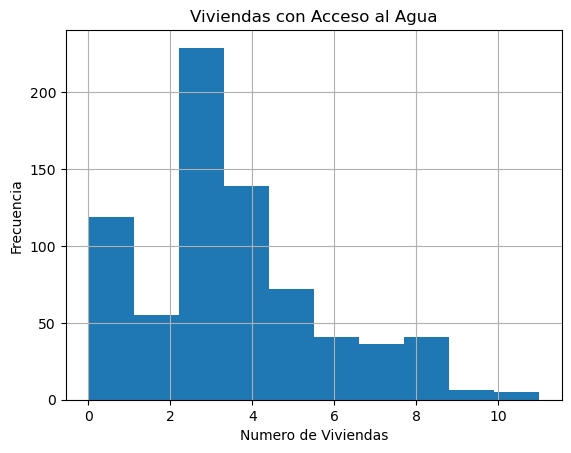

In [127]:
data_censo_agua['VPH_AGUADV'].hist();
plt.xlabel('Numero de Viviendas');
plt.ylabel('Frecuencia');
plt.title('Viviendas con Acceso al Agua');

In [108]:
var = 'VPH_AGUADV'
stats = {"mean": data_censo_agua[var].mean(),
 "var" : data_censo_agua[var].var(),
 "std" : data_censo_agua[var].std(),
 "skew" :  data_censo_agua[var].skew(),
 "kurtosis" : data_censo_agua[var].kurtosis()};
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame.from_dict(stats,orient='index',columns=['Value'])

,Value
mean,3.61507
var,4.72764
std,2.17431
skew,0.43583
kurtosis,0.12861


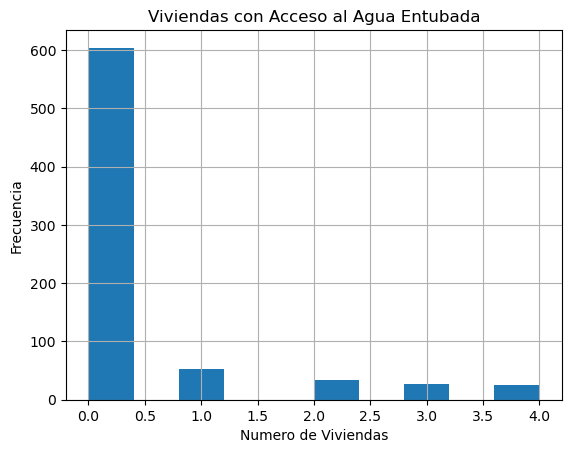

In [109]:
data_censo_agua['VPH_AEASP'].hist();
plt.xlabel('Numero de Viviendas');
plt.ylabel('Frecuencia');
plt.title('Viviendas con Acceso al Agua Entubada');

In [110]:
var = 'VPH_AEASP'
stats = {"mean": data_censo_agua[var].mean(),
 "var" : data_censo_agua[var].var(),
 "std" : data_censo_agua[var].std(),
 "skew" :  data_censo_agua[var].skew(),
 "kurtosis" : data_censo_agua[var].kurtosis()};
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame.from_dict(stats,orient='index',columns=['Value'])

,Value
mean,0.40646
var,0.95586
std,0.97768
skew,2.51501
kurtosis,5.36411


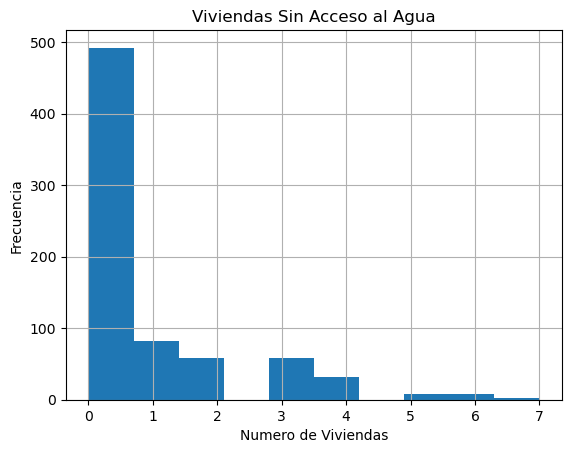

In [111]:
data_censo_agua['VPH_AGUAFV'].hist();
plt.xlabel('Numero de Viviendas');
plt.ylabel('Frecuencia');
plt.title('Viviendas Sin Acceso al Agua');

In [112]:
var = 'VPH_AGUAFV'
stats = {"mean": data_censo_agua[var].mean(),
 "var" : data_censo_agua[var].var(),
 "std" : data_censo_agua[var].std(),
 "skew" :  data_censo_agua[var].skew(),
 "kurtosis" : data_censo_agua[var].kurtosis()};
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame.from_dict(stats,orient='index',columns=['Value'])

,Value
mean,0.82638
var,2.00620
std,1.41641
skew,1.82721
kurtosis,2.86871


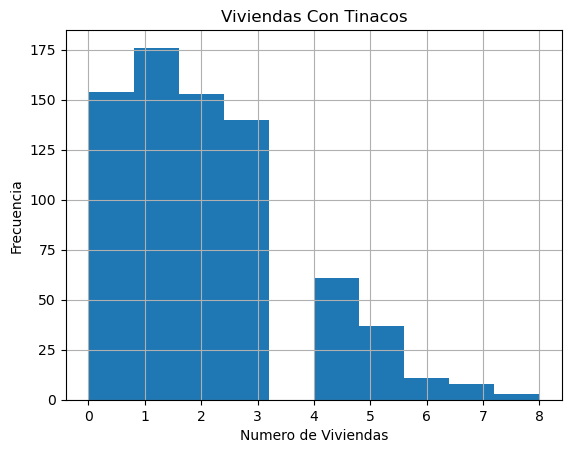

In [113]:
data_censo_agua['VPH_TINACO'].hist();
plt.xlabel('Numero de Viviendas');
plt.ylabel('Frecuencia');
plt.title('Viviendas Con Tinacos');

In [114]:
var = 'VPH_TINACO'
stats = {"mean": data_censo_agua[var].mean(),
 "var" : data_censo_agua[var].var(),
 "std" : data_censo_agua[var].std(),
 "skew" :  data_censo_agua[var].skew(),
 "kurtosis" : data_censo_agua[var].kurtosis()};
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame.from_dict(stats,orient='index',columns=['Value'])

,Value
mean,1.98789
var,2.68584
std,1.63885
skew,0.81155
kurtosis,0.48786


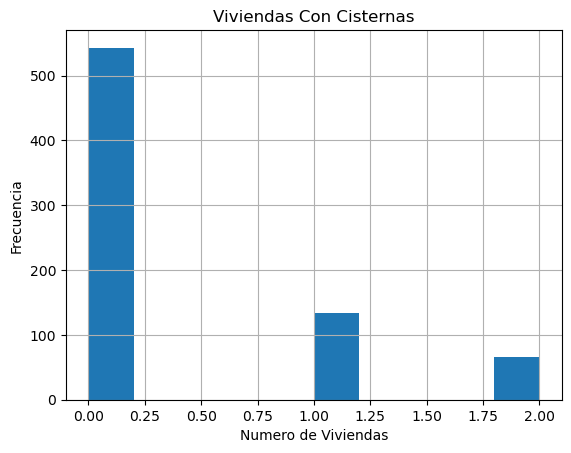

In [115]:
data_censo_agua['VPH_CISTER'].hist();
plt.xlabel('Numero de Viviendas');
plt.ylabel('Frecuencia');
plt.title('Viviendas Con Cisternas');

In [116]:
var = 'VPH_CISTER'
stats = {"mean": data_censo_agua[var].mean(),
 "var" : data_censo_agua[var].var(),
 "std" : data_censo_agua[var].std(),
 "skew" :  data_censo_agua[var].skew(),
 "kurtosis" : data_censo_agua[var].kurtosis()};
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame.from_dict(stats,orient='index',columns=['Value'])

,Value
mean,0.35801
var,0.40805
std,0.63878
skew,1.56946
kurtosis,1.16124


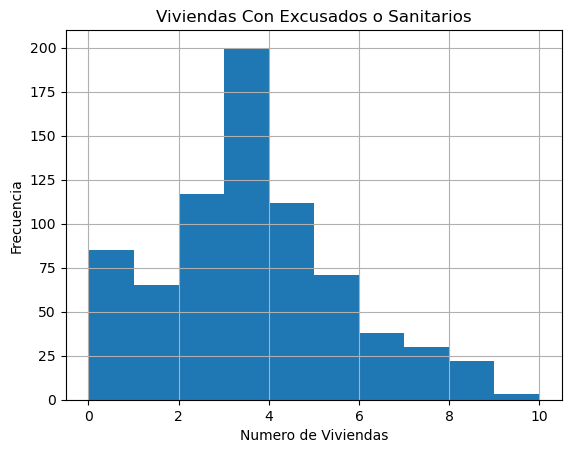

In [117]:
data_censo_agua['VPH_EXCSA'].hist();
plt.xlabel('Numero de Viviendas');
plt.ylabel('Frecuencia');
plt.title('Viviendas Con Excusados o Sanitarios');

In [118]:
var = 'VPH_EXCSA'
stats = {"mean": data_censo_agua[var].mean(),
 "var" : data_censo_agua[var].var(),
 "std" : data_censo_agua[var].std(),
 "skew" :  data_censo_agua[var].skew(),
 "kurtosis" : data_censo_agua[var].kurtosis()};
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame.from_dict(stats,orient='index',columns=['Value'])

,Value
mean,3.15478
var,4.06092
std,2.01517
skew,0.46519
kurtosis,0.00430


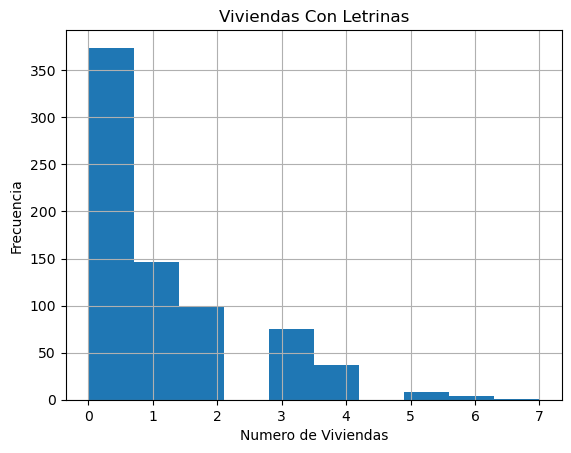

In [119]:
data_censo_agua['VPH_LETR'].hist();
plt.xlabel('Numero de Viviendas');
plt.ylabel('Frecuencia');
plt.title('Viviendas Con Letrinas');

In [120]:
var = 'VPH_LETR'
stats = {"mean": data_censo_agua[var].mean(),
 "var" : data_censo_agua[var].var(),
 "std" : data_censo_agua[var].std(),
 "skew" :  data_censo_agua[var].skew(),
 "kurtosis" : data_censo_agua[var].kurtosis()};
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame.from_dict(stats,orient='index',columns=['Value'])

,Value
mean,1.05787
var,1.84166
std,1.35708
skew,1.25095
kurtosis,0.97358


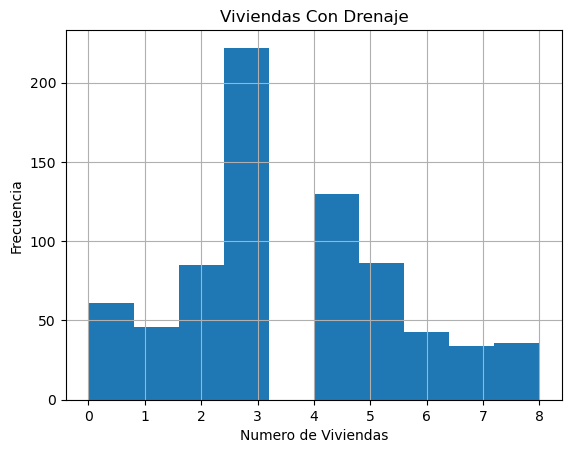

In [121]:
data_censo_agua['VPH_DRENAJ'].hist();
plt.xlabel('Numero de Viviendas');
plt.ylabel('Frecuencia');
plt.title('Viviendas Con Drenaje');

In [122]:
var = 'VPH_DRENAJ'
stats = {"mean": data_censo_agua[var].mean(),
 "var" : data_censo_agua[var].var(),
 "std" : data_censo_agua[var].std(),
 "skew" :  data_censo_agua[var].skew(),
 "kurtosis" : data_censo_agua[var].kurtosis()};
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame.from_dict(stats,orient='index',columns=['Value'])

,Value
mean,3.52086
var,3.93723
std,1.98425
skew,0.32606
kurtosis,-0.10083


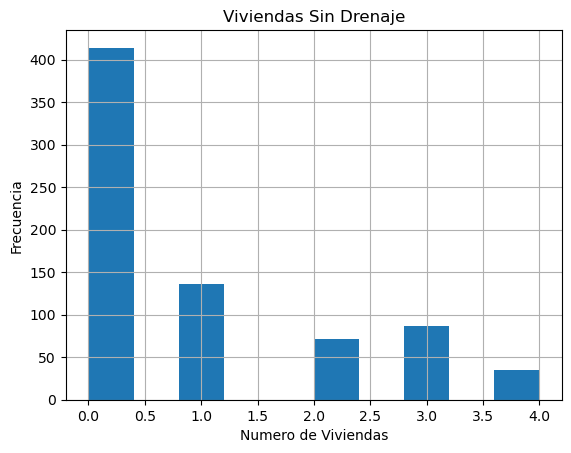

In [123]:
data_censo_agua['VPH_NODREN'].hist();
plt.xlabel('Numero de Viviendas');
plt.ylabel('Frecuencia');
plt.title('Viviendas Sin Drenaje');

In [124]:
var = 'VPH_NODREN'
stats = {"mean": data_censo_agua[var].mean(),
 "var" : data_censo_agua[var].var(),
 "std" : data_censo_agua[var].std(),
 "skew" :  data_censo_agua[var].skew(),
 "kurtosis" : data_censo_agua[var].kurtosis()};
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame.from_dict(stats,orient='index',columns=['Value'])

,Value
mean,0.91386
var,1.53974
std,1.24086
skew,1.12721
kurtosis,-0.02632
